# Rounding changes

_23 July 2021_ <br />
_Chuan-Zheng Lee <czlee@stanford.edu>_ <br />
_Rough working_

I was curious about whether the performance on the digital scheme was dependent on the property that the expectation of the rounded value is equal to the value, so I implemented a deterministic rounding option to see if it fares worse than the stochastic rounding that I originally implemented.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

from plots_utils import plot_averaged_training_charts, plot_evaluation_vs_clients, show_timestamp_info

In [2]:
results_dir = Path("../results-downloaded/20210723-deterministic-rounding/")
show_timestamp_info(results_dir)

| experiments in this directory | started at | finished at | duration |
|--:|:-:|:-:|--:|
| first to start | **23 Jul 2021, 03:12:48** | 23 Jul 2021, 03:28:11 | 15 min 23 s |
| last to finish | 23 Jul 2021, 06:03:08 | **23 Jul 2021, 06:42:02** | 38 min 53 s |
| shortest | 23 Jul 2021, 03:43:36 | 23 Jul 2021, 03:55:22 | **11 min 45 s** |
| longest | 23 Jul 2021, 06:00:09 | 23 Jul 2021, 06:39:41 | **39 min 32 s** |


# With $n = 5$

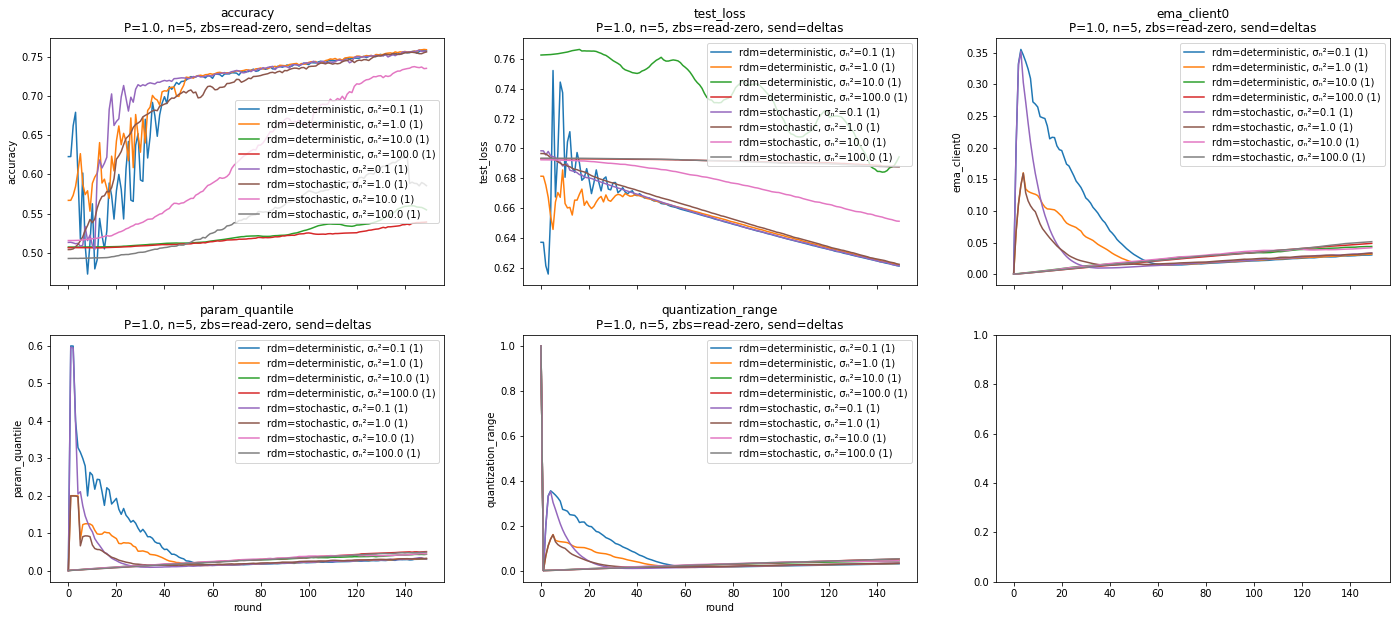

In [3]:
fixed_specs = {
    'rounds': 150,
    'batch_size': 64,
    'lr_client': 0.01,
    'epochs': 1,
    'small': False,
    'ema_coefficient': 1 / 3,
    'qrange_update_period': 1,
    'qrange_param_quantile': 0.9,
    'qrange_client_quantile': 0.9,
    'data_per_client': 20000,
    'channel_uses': None,
}
title_specs = {
    'power': 1.0,
    'clients': 5,
    'zero_bits_strategy': 'read-zero',
    'send': 'deltas',
}
series_specs = {
    'rounding_method': '__all__',
    'noise': '__all__',
}
fields = ['accuracy', 'test_loss', 'ema_client0', 'param_quantile', 'quantization_range']

plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

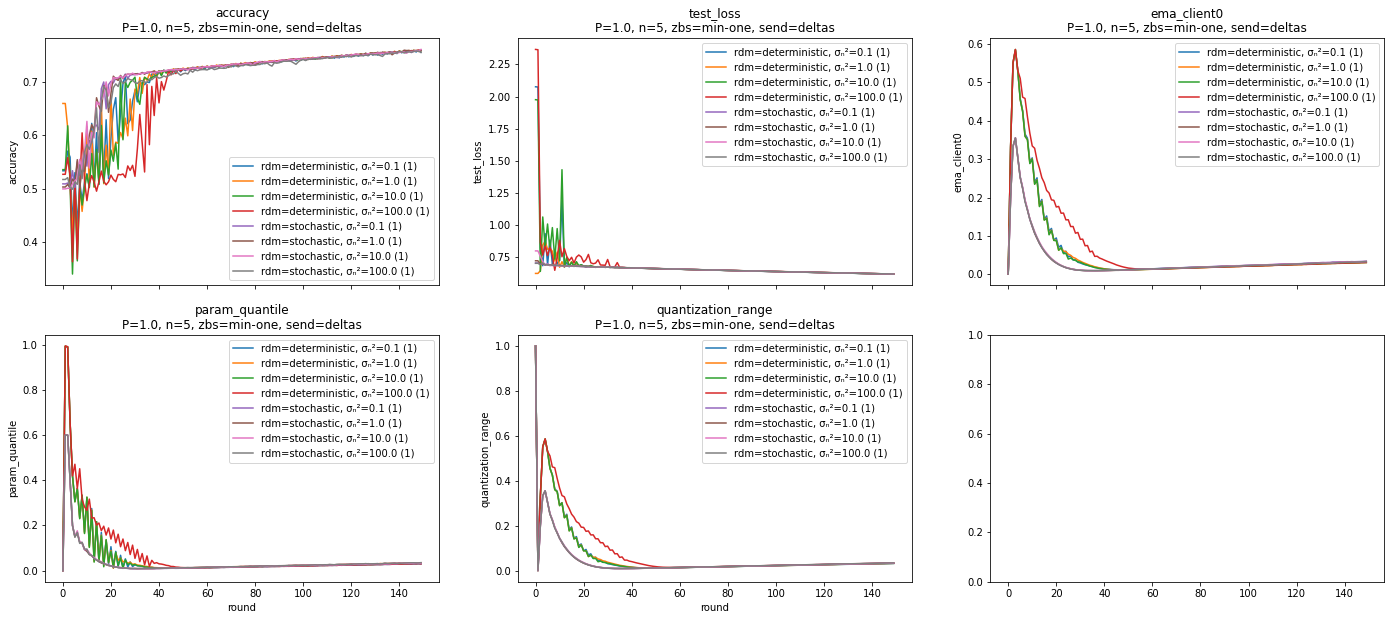

In [4]:
title_specs['zero_bits_strategy'] = 'min-one'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

Zoom in a little on those ones:

(0.0, 50.0)

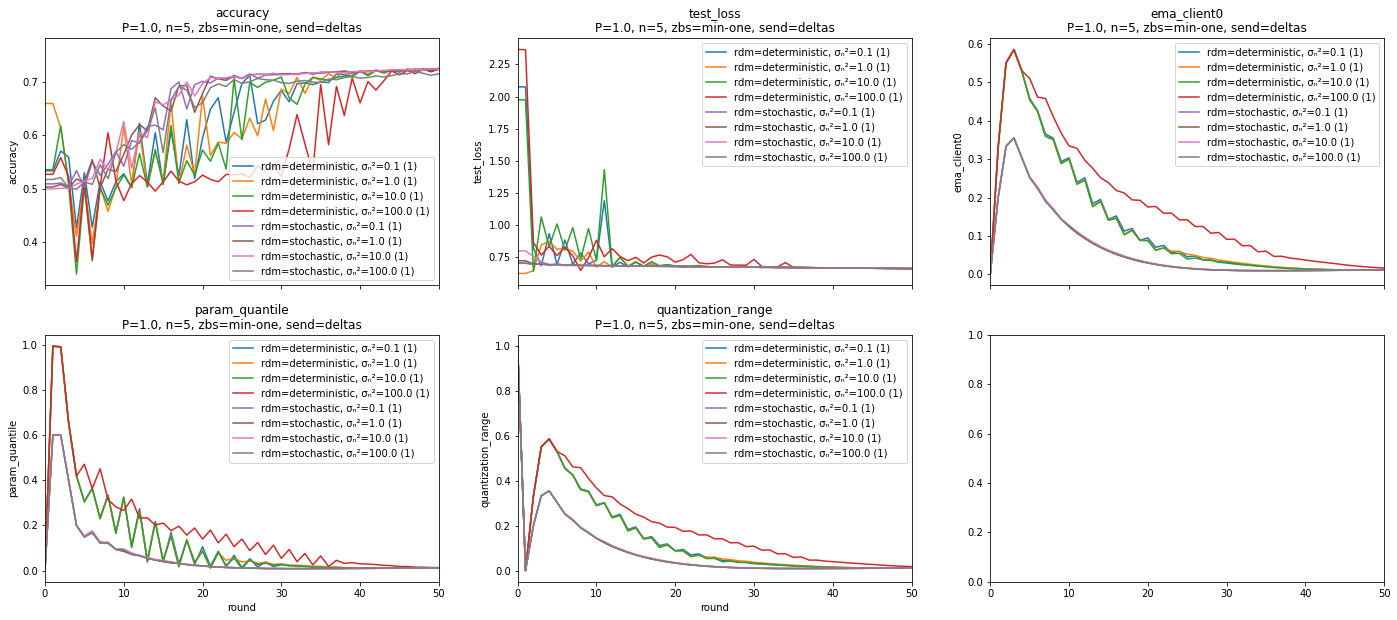

In [5]:
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)
plt.xlim((0, 50))

Okay, it's a little noisy, but there does seem to be something like that effect here.

# With $n = 20$

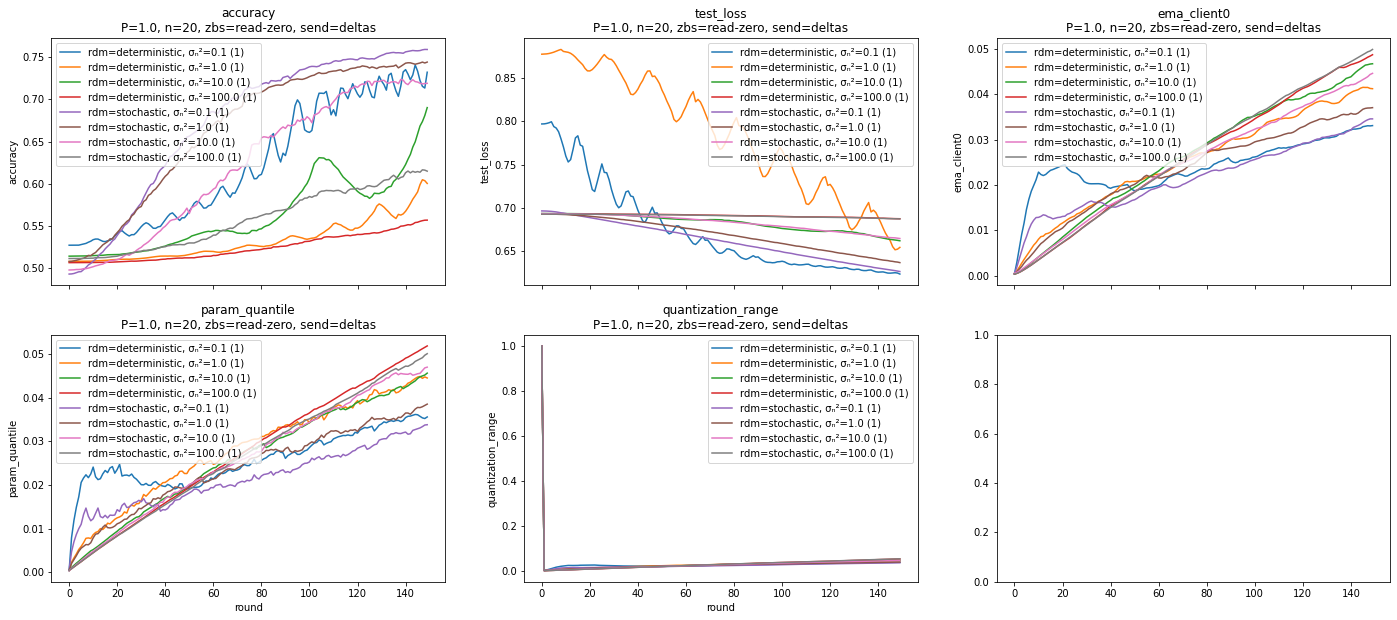

In [6]:
title_specs['zero_bits_strategy'] = 'read-zero'
title_specs['clients'] = 20
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)

For the `min-one` charts, zoom in to the first 50 rounds, because like for the $n = 5$ case, all the action seems to be there:

(0.0, 50.0)

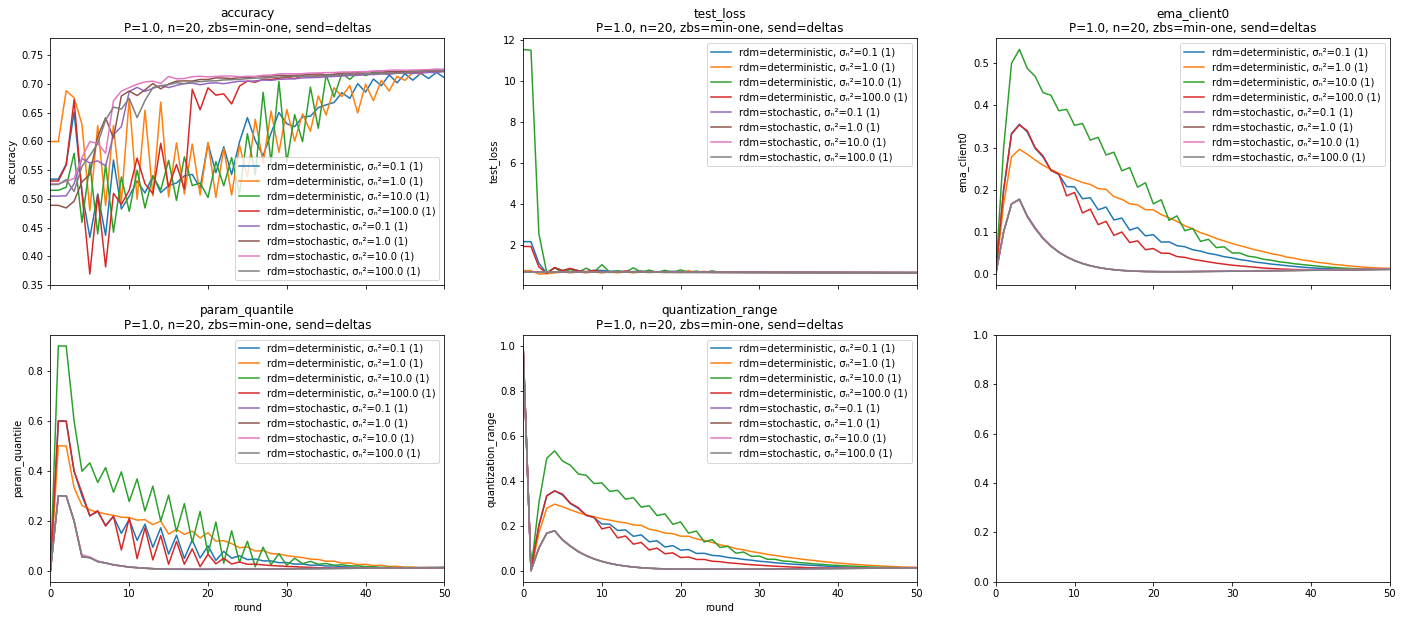

In [7]:
title_specs['zero_bits_strategy'] = 'min-one'
plot_averaged_training_charts(results_dir, fields, title_specs, fixed_specs, series_specs)
plt.xlim((0, 50))

The $n = 20$ cases are a lot more decisive about stochastic quantization being superior.